In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import metrics



In [67]:
df = pd.read_csv('analise.csv', delimiter=';')
df

,Ano de Notificacao,Vacinas,Numero de Casos,Coeficiente de Incidencia,Numero de Obitos,Coeficiente de Mortalidade
0,2013,93453,3,"0,03",0,0
1,2014,288873,5,"0,04",0,0
2,2015,272406,2,"0,02",0,0
3,2016,126278,0,0,0,0
4,2017,45560,0,0,0,0
5,2018,149898,3,"0,03",0,0
6,2019,14029,9370,"79,33",5,"0,04"
7,2020,3776,451,"3,8",1,"0,01"
8,2021,708,7,"0,06",0,0
9,2022,16125,5,"0,04",0,0


In [68]:
x = df['Vacinas'].to_numpy()
x_filtro = x[:-3]
y = df['Numero de Casos'].to_numpy()
y_filtro = y[:-3]

Eliminado os 3 ultimos anos devido a pandemia do covid 19. 

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x_filtro, y_filtro, test_size=0.2, random_state=0)

In [70]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(x_train.reshape(-1, 1))
scaler_y = StandardScaler()
Y = scaler_y.fit_transform(y_train.reshape(-1, 1))

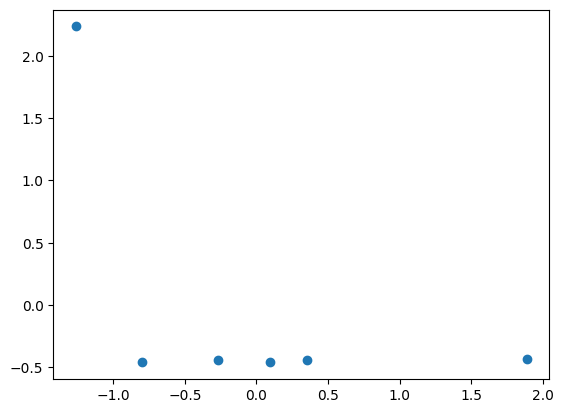

In [71]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)

In [72]:
linear_regression = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
linear_regression.compile(optimizer='SGD', loss='mean_squared_error')
linear_regression.fit(X, Y, epochs = 1000, batch_size=256, verbose=0)
y_pred = linear_regression.predict(x_test.reshape(-1, 1))

1/1 [==============================] - 0s 43ms/step


In [73]:

print('Acuracia: ', metrics.accuracy_score(y_test, y_pred.astype(int)))

Acuracia:  0.0


1/1 [==============================] - 0s 25ms/step


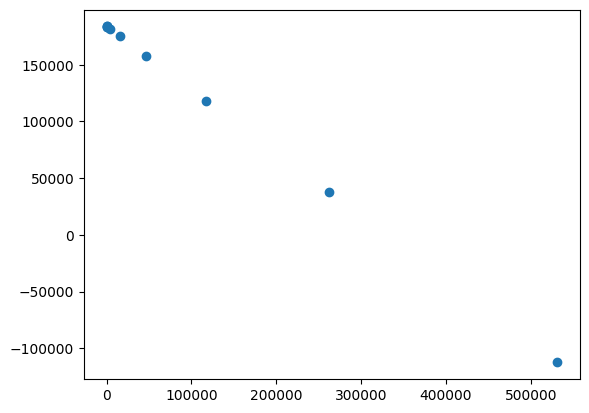

In [74]:
test_x = []
test_y = []
for i in range(10):
  x_simu = i**6  
  test_x.append(x_simu)
  scaler_previ = linear_regression.predict([scaler_x.transform([[x_simu]])])
  previsao = scaler_x.inverse_transform(scaler_previ)
  test_y.append(previsao[0][0])

plt.scatter(test_x, test_y)

### Polinomial

In [75]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(X.reshape(-1, 1))
poly.fit(x_train.reshape(-1, 1), y_train)


PolynomialFeatures()

In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_poly, y_train)

LinearRegression()

In [77]:
y_pred = model.predict(poly.fit_transform(x_test.reshape(-1, 1)))

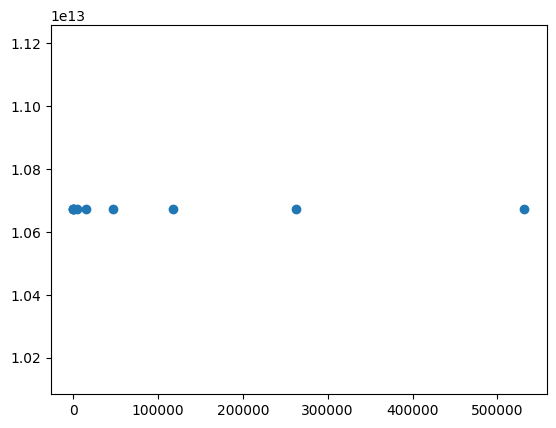

In [78]:
test_x = []
test_y = []
for i in range(10):
  x_simu = i**6
  x_simu = np.asarray(x_simu)  
  test_x.append(x_simu)
  scaler_previ = model.predict(poly.fit_transform(x_test.reshape(-1, 1)))
  previsao = scaler_x.inverse_transform(scaler_previ)
  test_y.append(previsao[0][0])

plt.scatter(test_x, test_y)